<a href="https://colab.research.google.com/github/Sakshi3071/OIBSIP_TASK-2_-UNEMPLOYMENT_DATA_ANALYSIS_WITH_PYTHON-/blob/main/OIBSIP_DATA_SCIENCE_TASK_2(UNEMPLOYMENT_ANALYSIS_WITH_PYTHON).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

IMPORTING NECESSARY LIBRARIES

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime

In [2]:
data = pd.read_csv("/content/Unemployment in India.csv")

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,latitude,longitude
0,Andhra Pradesh,31-05-2019,M,3.65,11999139,43.24,Rural,15.9129,79.74
1,Andhra Pradesh,30-06-2019,M,3.05,11755881,42.05,Rural,15.9129,79.74
2,Andhra Pradesh,31-07-2019,M,3.75,12086707,43.50,Rural,15.9129,79.74
3,Andhra Pradesh,31-08-2019,M,3.32,12285693,43.97,Rural,15.9129,79.74
4,Andhra Pradesh,30-09-2019,M,5.17,12256762,44.68,Rural,15.9129,79.74


In [4]:
data.shape

(740, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    int64  
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
 7   latitude                                  740 non-null    float64
 8   longitude                                 740 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 52.2+ KB


In [6]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
latitude                                    0
longitude                                   0
dtype: int64



---

DATA PREPROCESSING

---


In [7]:
column_mapping={
    ' Date':'Date',
    ' Frequency':'Frequency',
    ' Estimated Unemployment Rate (%)':'Estimated_Unemployment_Rate(%)',
    ' Estimated Employed':'Estimated_Employed',
    ' Estimated Labour Participation Rate (%)':'Estimated_Labour_Participation_Rate(%)'
}

data=data.rename(columns=column_mapping)

In [8]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate(%)', 'Area',
       'latitude', 'longitude'],
      dtype='object')

In [9]:
# Convert the 'Date' column to datetime format
data['Date']=pd.to_datetime(data['Date'])

In [10]:
#Creating day column from unemp_df['Date']
data['day']=data['Date'].dt.day

#Creating month column from unemp_df['Date']
data['month']=data['Date'].dt.month

##Creating year column from unemp_df['Date']
data['year']=data['Date'].dt.year

In [11]:
data.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate(%),Estimated_Employed,Estimated_Labour_Participation_Rate(%),Area,latitude,longitude,day,month,year
0,Andhra Pradesh,2019-05-31,M,3.65,11999139,43.24,Rural,15.9129,79.74,31,5,2019
1,Andhra Pradesh,2019-06-30,M,3.05,11755881,42.05,Rural,15.9129,79.74,30,6,2019
2,Andhra Pradesh,2019-07-31,M,3.75,12086707,43.50,Rural,15.9129,79.74,31,7,2019
3,Andhra Pradesh,2019-08-31,M,3.32,12285693,43.97,Rural,15.9129,79.74,31,8,2019
4,Andhra Pradesh,2019-09-30,M,5.17,12256762,44.68,Rural,15.9129,79.74,30,9,2019


In [12]:
data.dtypes

Region                                            object
Date                                      datetime64[ns]
Frequency                                         object
Estimated_Unemployment_Rate(%)                   float64
Estimated_Employed                                 int64
Estimated_Labour_Participation_Rate(%)           float64
Area                                              object
latitude                                         float64
longitude                                        float64
day                                                int64
month                                              int64
year                                               int64
dtype: object



---

UNEMPLOYMENT_DATA_ANALYSIS

---


In [13]:
# Create two DataFrames, one for 2019 data and one for 2020 data
data2019 = data[data['year'] == 2019]
data2020 = data[data['year'] == 2020]

In [14]:
import plotly.graph_objects as go
import plotly.subplots as sp

In [15]:
region_sum_2019 = data2019.groupby('Region')['Estimated_Employed'].sum().sort_values().reset_index()
region_sum_2020 = data2020.groupby('Region')['Estimated_Employed'].sum().sort_values().reset_index()

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['2019', '2020'], shared_yaxes=True)

# Add bar plot for 2019
fig.add_trace(go.Bar(
    y=region_sum_2019['Region'],
    x=data2019.groupby('Region')['Estimated_Employed'].sum().sort_values().values,
    orientation='h',
    name='2019',
    marker=dict(color='lightgreen', line=dict(color='black', width=1))
), row=1, col=1)

# Add bar plot for 2020
fig.add_trace(go.Bar(
    y=region_sum_2020['Region'],
    x=data2020.groupby('Region')['Estimated_Employed'].sum().sort_values().values,
    orientation='h',
    name='2020',
    marker=dict(color='orange', line=dict(color='black', width=1))
), row=1, col=2)

# Update layout
fig.update_layout(
    height=700,
    width=1000,
    showlegend=False,
    title_text='Distribution of Total Estimated Employed in 2019 v/s 2020 by State'
)

# Set x-axis and y-axis titles
fig.update_xaxes(title_text='Total Estimated Employed', row=1, col=1)
fig.update_xaxes(title_text='Total Estimated Employed', row=1, col=2)
fig.update_yaxes(title_text='State', row=1, col=1)

# Show the plot
fig.show()


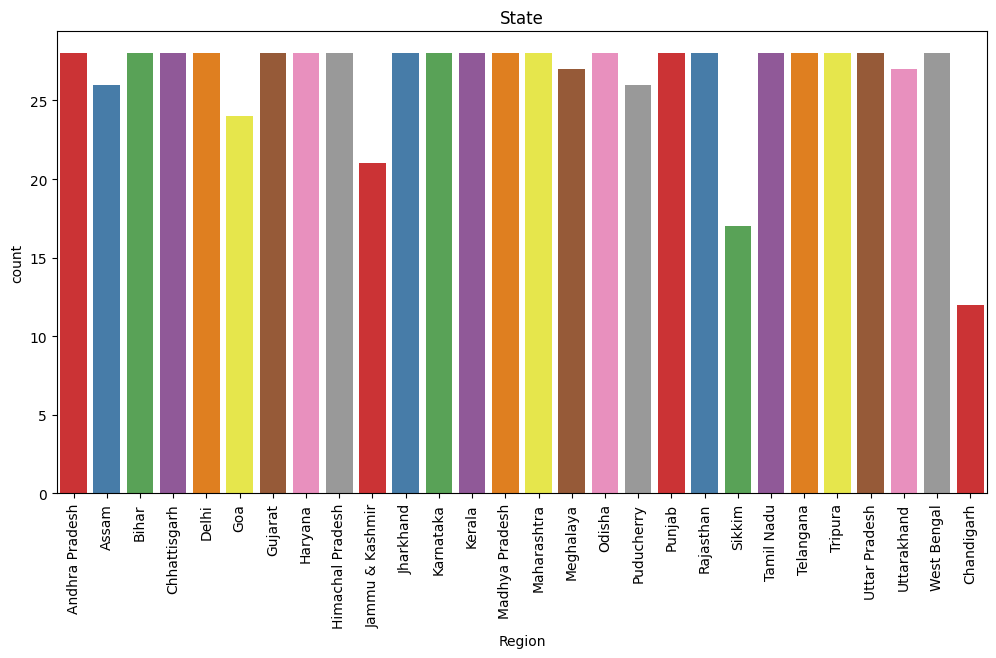

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Region'],palette = "Set1")
plt.xticks(rotation='vertical')
plt.title('State')
plt.show();

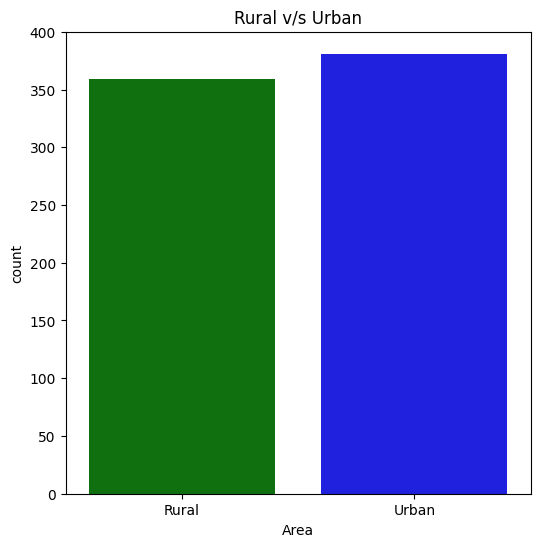

In [17]:
# value count for each category in ['Area'] column
data['Area'].value_counts()
plt.figure(figsize=(6, 6))
sns.countplot(x=data['Area'],palette = ['green','blue'])
plt.title('Rural v/s Urban')
plt.show()

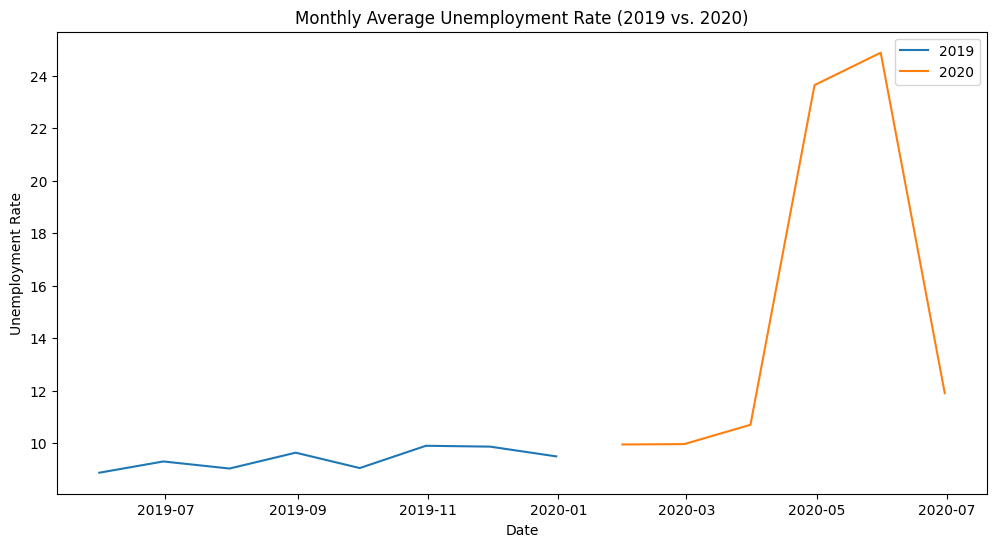

In [18]:
# Calculate the monthly average unemployment rate for each year
monthly_avg_2019 = data2019.groupby('Date')['Estimated_Unemployment_Rate(%)'].mean()
monthly_avg_2020 = data2020.groupby('Date')['Estimated_Unemployment_Rate(%)'].mean()

# Plot the unemployment rate for each year
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_2019, label='2019')
plt.plot(monthly_avg_2020, label='2020')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Average Unemployment Rate (2019 vs. 2020)')
plt.legend()

plt.show()


In [19]:
data['Year'] = data['Date'].dt.year

# Create a scatter plot
fig = px.scatter(
    data_frame=data,
    x='Estimated_Unemployment_Rate(%)',
    y='Region',
    color='Year',
    color_continuous_scale='sunsetdark',
    height=600,
    width=900,
    animation_frame='Year',
    range_y=[data['Region'].min(), data['Region'].max()],  # Set the range for the y-axis
)

fig.update_layout(
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(label='Play',
                      method='animate',
                      args=[None,
                            {'frame': {'duration': 1000, 'redraw': False},
                             'fromcurrent': True,
                             'transition': {'duration': 100, 'easing': 'quadratic-in-out'}}]
                      )]
    )]
)

fig.show()

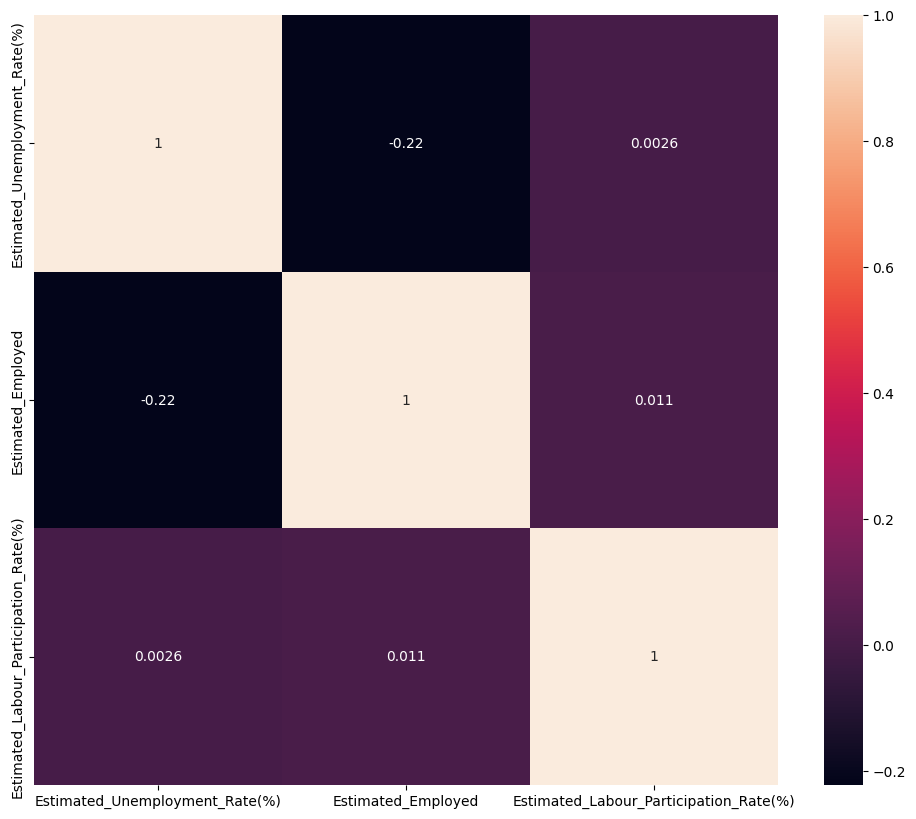

In [20]:

plt.figure(figsize=(12,10))
sns.heatmap(data[['Estimated_Unemployment_Rate(%)',
                'Estimated_Employed',
                'Estimated_Labour_Participation_Rate(%)']].corr(),
            annot=True
)
plt.show();

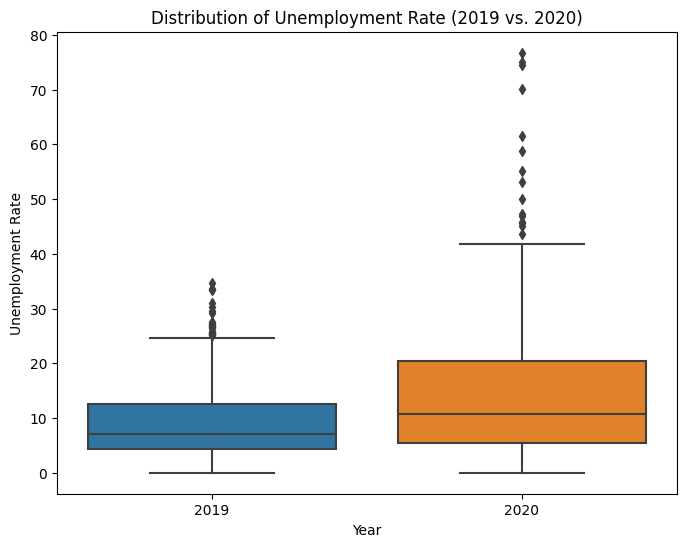

In [21]:
# Concatenate the two datasets
combined_data = pd.concat([data2019, data2020], ignore_index=True)



# Plot a box plot to compare the distribution of unemployment rates between the two years
plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_data['Date'].dt.year, y=combined_data['Estimated_Unemployment_Rate(%)'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Distribution of Unemployment Rate (2019 vs. 2020)')

plt.show()

In [22]:
combined_data

,Region,Date,Frequency,Estimated_Unemployment_Rate(%),Estimated_Employed,Estimated_Labour_Participation_Rate(%),Area,latitude,longitude,day,month,year
0,Andhra Pradesh,2019-05-31,M,3.65,11999139,43.24,Rural,15.9129,79.740,31,5,2019
1,Andhra Pradesh,2019-06-30,M,3.05,11755881,42.05,Rural,15.9129,79.740,30,6,2019
2,Andhra Pradesh,2019-07-31,M,3.75,12086707,43.50,Rural,15.9129,79.740,31,7,2019
3,Andhra Pradesh,2019-08-31,M,3.32,12285693,43.97,Rural,15.9129,79.740,31,8,2019
4,Andhra Pradesh,2019-09-30,M,5.17,12256762,44.68,Rural,15.9129,79.740,30,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
735,West Bengal,2020-02-29,M,7.55,10871168,44.09,Urban,22.9868,87.855,29,2,2020
736,West Bengal,2020-03-31,M,6.67,10806105,43.34,Urban,22.9868,87.855,31,3,2020
737,West Bengal,2020-04-30,M,15.63,9299466,41.20,Urban,22.9868,87.855,30,4,2020
738,West Bengal,2020-05-31,M,15.22,9240903,40.67,Urban,22.9868,87.855,31,5,2020


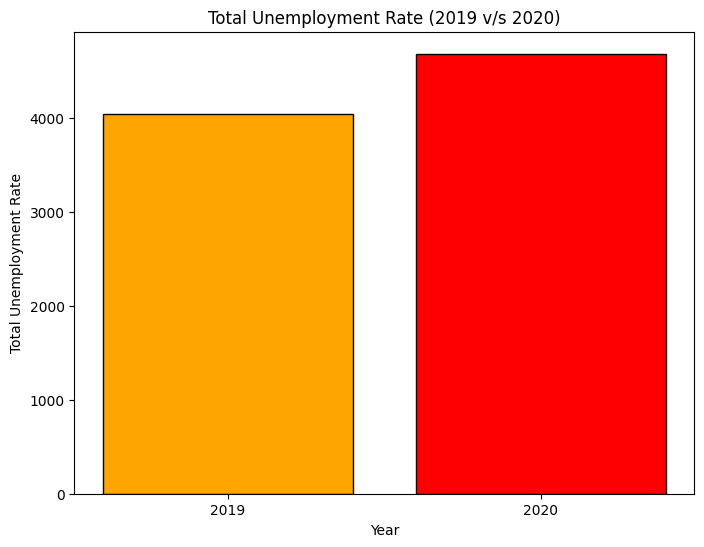

In [23]:
# Calculate the total unemployment rate for each year
total_2019 = data2019['Estimated_Unemployment_Rate(%)'].sum()
total_2020 = data2020['Estimated_Unemployment_Rate(%)'].sum()

# Create a bar plot to compare the total unemployment rate between the two years
plt.figure(figsize=(8, 6))
plt.bar(
    ['2019', '2020'],
    [total_2019, total_2020],
    color=['orange','red'],
     edgecolor='black', linewidth=1
)
plt.xlabel('Year')
plt.ylabel('Total Unemployment Rate')
plt.title('Total Unemployment Rate (2019 v/s 2020)')

plt.show();



---



---

